# Titanic Correlation Heatmap

## Problem Statement
Analyzing correlations in Titanic dataset.

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

UPLOAD DATASET

In [14]:


df = pd.read_csv("/home/mahek-patel/Desktop/Titanic-Dataset.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Since the dataset has both numeric values and categorical values, and we know that correlation works only on numeric data. Hence we will create a new dataframe with only numeric values.

In [19]:
df_num=df.select_dtypes(include="number")

In [21]:
df_num.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
corr=df_num.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


we use pandas to get correlation matrix and sns to get the heatmap. 
the (.corr) helps us get the correlation matrix.

INTERPRETING THE RESULTS
1)Survived and Pclass show a negative correlation (-0.338). This means as passenger class number increases (from 1 → 3), the chance of survival decreases. Passengers in 3rd class had the lowest survival rate.
2)Age and Fare show a very weak positive correlation (0.096). This value is close to zero, meaning there is almost no meaningful relationship between age and fare.


<Axes: >

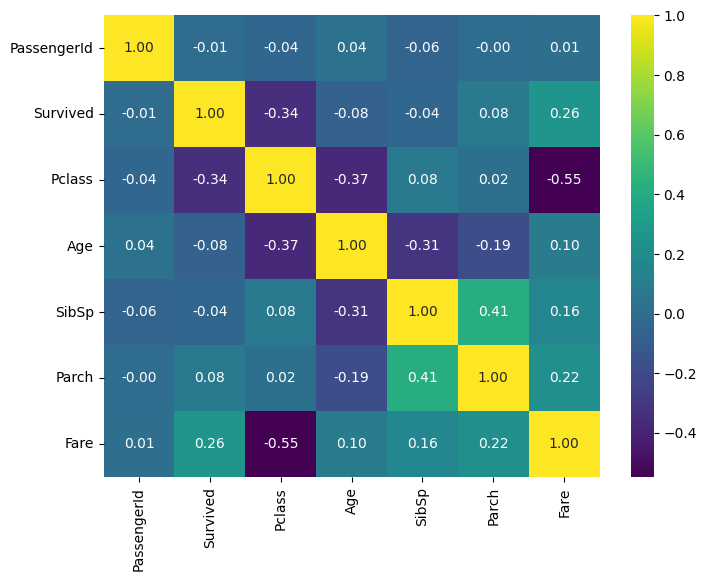

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="viridis",fmt=".2f")

INTERPRETATION OF RESULTS
1) Survived vs Pclass → -0.34

Negative correlation.

Means: Higher passenger class (1st class = 1, 3rd class = 3) → lower survival chance.

Matches the historical fact: First-class passengers had better survival.

2) Survived vs Fare → +0.26

Positive correlation.

Means: Higher fare passengers (likely richer/first-class) were more likely to survive.

3) Pclass vs Fare → -0.55

Strong negative correlation.

Means: Lower class number (1st class) → higher fare.
Higher class number (3rd class) → cheaper fare.

4) SibSp vs Parch → +0.41

Moderate positive correlation.

Means: If a passenger had siblings/spouses aboard, they were also likely to have parents/children aboard.

5) Age vs Pclass → -0.37

Negative correlation.